In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=fb8c45ba403cb7d3a672ddcb5593a5ad79146fe086c059003aa69d6bb8c5ced8
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

#added missing bnltk
bnltk = NLTKTokenizer()

In [3]:
df_train = pd.read_excel("/kaggle/input/dataset-stem/UBMEC.xlsx")

In [4]:
df_train.head()

text   classes
0  এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...       joy
1  ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...  surprise
2  বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "কোথাও কেউ...       joy
3  এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...       joy
4  কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...  surprise

In [5]:
df_train.dropna(inplace=True)

In [6]:
df_train['text'] = df_train['text'].astype(str)

In [7]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3648


In [8]:
df_train['classes'].value_counts()

classes
joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: count, dtype: int64

In [9]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [10]:
# Example usage:
df_train['text'] = df_train['text'].apply(apply_bangla_stemming)


applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fo

In [11]:
df_train['text']

0        এই নাটক হচ্ ১৯৯৩ সাল । কিন্তু তখন ইউটিউব ছিলোন...
1        ২০২১ সালে যার “ কোথা কেউ নেই ” দেখ আসে - তাদের...
2        বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক `` কোথা কে...
3        এত সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে ...
4        কখনো চিন্তা করিনি জন্ম ৭-৮ বছর আগ নাটক দেখবো ত...
                               ...                        
13431    Bravo বললে ছোট কর হবে ৷ সুতরাং হাজারো সাল আজক ...
13432    কি যে কর না ম্যাজিস্ট্রেট স্য ? প্রথমটুক পড়ে ভ...
13433    আপনা এই সত্য পথে অবিচল থাকুন দেশবাসী আপনা সর্ব...
13434                  এগা যান । আপনা দিকে তাকা বাংলাদেশ ।
13435    দুর্নীতি মুক্ত হলে নিশ্চয় চোর মুক্ত হবে , বিশ্...
Name: text, Length: 13436, dtype: object

In [12]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3578


In [13]:
df_train['text'] 

0        এই নাটক হচ্ ১৯৯৩ সাল । কিন্তু তখন ইউটিউব ছিলোন...
1        ২০২১ সালে যার “ কোথা কেউ নেই ” দেখ আসে - তাদের...
2        বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক `` কোথা কে...
3        এত সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে ...
4        কখনো চিন্তা করিনি জন্ম ৭-৮ বছর আগ নাটক দেখবো ত...
                               ...                        
13431    Bravo বললে ছোট কর হবে ৷ সুতরাং হাজারো সাল আজক ...
13432    কি যে কর না ম্যাজিস্ট্রেট স্য ? প্রথমটুক পড়ে ভ...
13433    আপনা এই সত্য পথে অবিচল থাকুন দেশবাসী আপনা সর্ব...
13434                  এগা যান । আপনা দিকে তাকা বাংলাদেশ ।
13435    দুর্নীতি মুক্ত হলে নিশ্চয় চোর মুক্ত হবে , বিশ্...
Name: text, Length: 13436, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [15]:
X_train  =  train_df['text'].values.tolist()
y_train = train_df['classes'].tolist()

In [16]:
X_test =  test_df['text'].values.tolist()
y_test = test_df['classes'].tolist()

In [17]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 9.9 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=481328540c76fcb908643618631bf694fb0abfbd38b4cdb07f36cb09593f9e26
  Stored in directory: /root

In [18]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [19]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 20
	95percentile : 44
	99percentile : 85


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 20
	95percentile : 46
	99percentile : 87


In [20]:
print(trn)

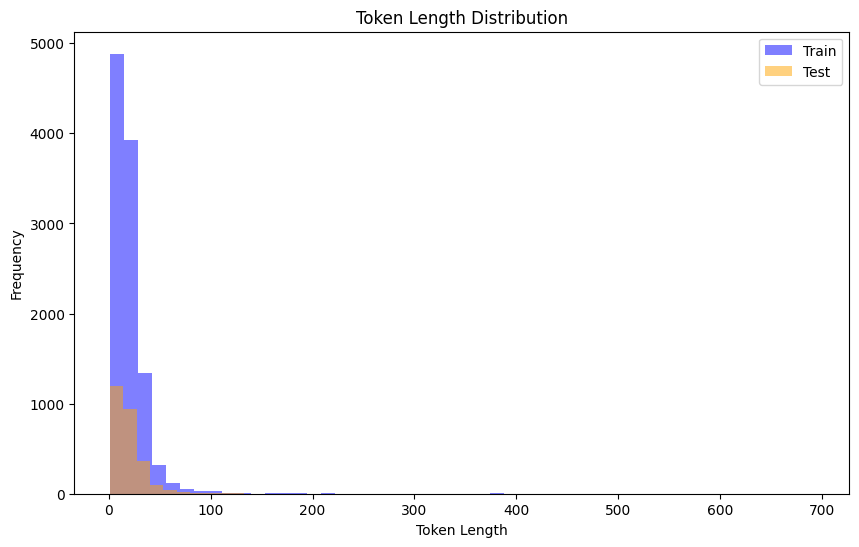

In [21]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [22]:
model = t.get_classifier()

In [23]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [24]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [25]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1344/1344 [==============================] - 888s 641ms/step - loss: 1.6387 - accuracy: 0.3282 - val_loss: 1.4192 - val_accuracy: 0.4550
Epoch 2/10
1344/1344 [==============================] - 857s 638ms/step - loss: 1.3997 - accuracy: 0.4543 - val_loss: 1.1993 - val_accuracy: 0.5450
Epoch 3/10
1344/1344 [==============================] - 859s 639ms/step - loss: 1.1971 - accuracy: 0.5574 - val_loss: 1.1591 - val_accuracy: 0.5618
Epoch 4/10
1344/1344 [==============================] - 860s 640ms/step - loss: 1.0957 - accuracy: 0.5966 - val_loss: 1.1710 - val_accuracy: 0.5547
Epoch 5/10
1344/1344 [==============================] - 859s 639ms/step - loss: 1.4795 - accuracy: 0.4159 - val_loss: 1.9934 - val_accuracy: 0.2712
Epoch 6/10
1344/1344 [==============================] - 859s 639ms/step - loss: 1.0746 - accuracy: 0.5974 - val_loss: 1.2079 - val_accuracy: 0.5610
Epoch 7/10
1344/1344 [===========================

In [26]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [27]:
classes=t.get_classes()

In [28]:
cm = learner.validate(class_names=t.get_classes())

84/84 [==============================] - 60s 677ms/step
              precision    recall  f1-score   support

       anger       0.57      0.55      0.56       496
     disgust       0.43      0.40      0.42       416
        fear       0.67      0.62      0.64       272
         joy       0.77      0.76      0.77       694
     sadness       0.55      0.58      0.57       537
    surprise       0.41      0.47      0.44       273

    accuracy                           0.59      2688
   macro avg       0.57      0.57      0.57      2688
weighted avg       0.59      0.59      0.59      2688



In [29]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [30]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [31]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [32]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [33]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")